In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [5]:
#Adding patients data
patient1 = [76,126,38.0]
patient2 =[74,120,38.0]
patient3 = [72,118,37.5]
patient4 = [78,136,37.0]

**Visualize the data in graph**

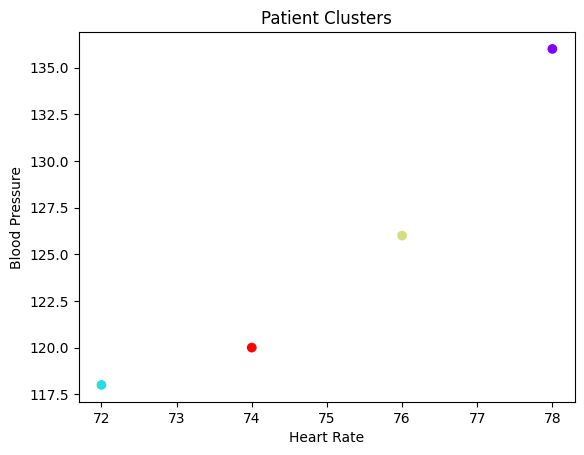

In [9]:
#lets visualize the data in graph
data = np.array([
    patient1,patient2,patient3,patient4
])

# Perform hierarchical clustering
n_clusters = 4  # Number of clusters
cluster_model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = cluster_model.fit_predict(data)

# Create a scatter plot for the clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Patient Clusters')
plt.xlabel('Heart Rate')
plt.ylabel('Blood Pressure')
plt.show()

**Which patient is farthest from the rest?**

In [16]:
# Which patient is farthest from the rest?
sum = data[0] - data[1]
# print(data[0])
# print(data[1])
# sum_sq =  np.dot(sum.T,sum)
# print(np.sqrt(sum_sq))

num_points = data.shape[0]

# Initialize variables to store the minimum and maximum distances and their corresponding pairs
min_distance = float('inf')
max_distance = 0
min_distance_indices = (-1, -1)
max_distance_indices = (-1, -1)

# Calculate Euclidean distances using nested loops
for i in range(num_points):
    for j in range(i + 1, num_points):
        distance = np.sqrt(np.sum((data[i] - data[j]) ** 2))
        if distance < min_distance:
            min_distance = distance
            min_distance_indices = (i, j)
        if distance > max_distance:
            max_distance = distance
            max_distance_indices = (i, j)



# Print the patient farthest from the rest
print("Patient", max_distance_indices[1] + 1,"have the greatest distance:", max_distance)

Patient 4 have the greatest distance: 18.980252896102307


**Which two patients are nearest?**

In [18]:
# Which two patients are nearest?
# Calculate pairwise distances
distances = np.sqrt(np.sum((data[:, np.newaxis] - data) ** 2, axis=2))

# Find the indices of the two patients with the smallest non-zero distance
min_distance = np.min(distances[distances > 0])  # Find smallest non-zero distance
indices = np.where(distances == min_distance)
patient1_index, patient2_index = indices[0][0], indices[1][0]

# Print the two patients who are nearest to each other
print("Patient", patient1_index + 1, "and Patient", patient2_index + 1, "are nearest.")
print("Distance:", min_distance)

Patient 2 and Patient 3 are nearest.
Distance: 2.8722813232690143


**Create a new dummy patient, and then find which is the closest patient?**

In [22]:
#Create a new dummy patient, and then find which is the closest patient?

# Calculate pairwise distances between existing patients
distances = np.sqrt(np.sum((data[:, np.newaxis] - data) ** 2, axis=2))

# Create a new dummy patient
new_dummy_patient = np.array([75, 130, 37.8])

# Calculate distances between the new dummy patient and existing patients
new_patient_distances = np.sqrt(np.sum((data - new_dummy_patient) ** 2, axis=1))

# Find the index of the closest patient to the new dummy patient
closest_patient_index = np.argmin(new_patient_distances)

# Print the closest patient to the new dummy patient
print("The closest patient to the new dummy patient is Patient", closest_patient_index + 1)
print("Distance:", new_patient_distances[closest_patient_index])

The closest patient to the new dummy patient is Patient 1
Distance: 4.127953488110059


**1. What is the time complexity of this operation of finding the closest two and farthest patients? Specify using BigO notation.**

**Solution:**

1. **Calculating Pairwise Distances:** To calculate pairwise distances, nested loops must compare each patient to every other patient, omitting the patient being compared with. Let's write n for the number of patients.

    1. We must compare each patient with every other patient in order to identify the two patients who are closest to one another. This entails calculating distances by around n * (n-1) factors.

    2. Similar calculations requiring approximately n * (n-1) distances are required to determine which two patients are the furthest apart.
    
2. **Finding the Closest and Farthest Patients:** After computing all pairwise distances, it is necessary to linearly scan through the distances, which requires an O(n) amount of time.
    * Obtaining the Closest Two: O(n * n)
    * Obtaining the Farthest Two: O(n * n)

Both of these processes have an O(n2) time complexity in Big O notation, where n is the total number of patients. With more patients, the time complexity climbs quadratically, which could be inefficient for big datasets.



**2.  Can you name one practical use of such a simple technique when about 100s of features are available and
thousands of patient data is available?**

**Solution:**

Educational Program Recommendation:
    1. Feature Selection : Collection of students datacdemic performance.
    2. Student Similarity : Students with same name, parents name.